### **Adeline Makokha**
### **191199**
### **DSA 8401: Applied Machine Learning**

### Objective
The objective of this assignment is the students perform a preprocessing process
on a dataset from the MIMIC-III database, which contains information
on in-hospital mortality from the monitoring of patients in the Intensive Care
Unit (ICU) for 48 hours..

In [1]:
# Import packages

import  pandas as pd
import  seaborn as sns
import  matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


These imports the relevant libraries to be used.

In [2]:
#loading data from github
url = "https://raw.githubusercontent.com/adeline-pepela/Module-4/main/Applied%20Machine%20Learning/ihm_48_hours.csv"
df = pd.read_csv(url)

In [3]:
#display the first rows of the data
df.head()

,Capillary refill rate,Diastolic blood pressure,Fraction inspired oxygen,Glascow coma scale eye opening,Glascow coma scale motor response,Glascow coma scale total,Glascow coma scale verbal response,Glucose,Heart Rate,Height,Mean blood pressure,Oxygen saturation,Respiratory rate,Systolic blood pressure,Temperature,Weight,pH,Patient_id,target
0,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,-11.396037,-19.976803,NaN,76.0,94.000000,17.0,116.0,36.388889,83.5,NaN,30552,0
1,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
2,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,-6.497052,18.0,116.0,36.388889,83.5,NaN,30552,0
3,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0
4,NaN,73.0,NaN,Spontaneously,Obeys Commands,NaN,Oriented,115.000000,96.000000,NaN,76.0,95.000000,18.0,116.0,36.388889,83.5,NaN,30552,0


In [4]:
#shape of the data
df.shape

(300912, 19)

### Enumeration of Variables: List the categorical variables, indicating which are binary and which are considered nominal. List the numerical variables present in the data set.

In [16]:
'''Its method is a quick way to:Understand the structure of your DataFrame (number of rows and columns).
  Check the data types of each column.
  Identify missing values in each column.
  Estimate memory usage of the DataFrame.
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300912 entries, 0 to 300911
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Capillary refill rate               6336 non-null    float64
 1   Diastolic blood pressure            296944 non-null  float64
 2   Fraction inspired oxygen            88464 non-null   float64
 3   Glascow coma scale eye opening      274190 non-null  object 
 4   Glascow coma scale motor response   296978 non-null  object 
 5   Glascow coma scale total            184416 non-null  float64
 6   Glascow coma scale verbal response  296884 non-null  object 
 7   Glucose                             300698 non-null  float64
 8   Heart Rate                          300912 non-null  float64
 9   Height                              55824 non-null   float64
 10  Mean blood pressure                 296984 non-null  float64
 11  Oxygen saturation         

### Enumeration of Variables: List the categorical variables, indicating which are binary and which are considered nominal. List the numerical variables present in the data set.

1. **Categorical Variables**

They are stored as object or represent discrete states. From our data we have:

Glascow coma scale eye opening - nominal categories like Spontaneously, To Pain, etc.

Glascow coma scale motor response - nominal categories like Obeys Commands, Flexion Abnormal, etc.

Glascow coma scale verbal response - nominal categories like Oriented, Incomprehensible, etc.

Patient_id is a nominal identifier which is not useful as a feature, just an ID.

Capillary refill rate could also be categorical often binary like Normal / Abnormal but here it is stored as float64 with many NaNs.

2. **Binary Variables**

target is a binary categorical with 0 = survived, 1 = mortality within hospital stay.

3. **Numerical Variables**

These are continuous measurements from ICU monitoring:

Capillary refill rate, Diastolic blood pressure, Fraction inspired oxygen (FiO₂), Glascow coma scale total, Glucose, Heart Rate, Height, Mean blood pressure, Oxygen saturation (SpO₂), Respiratory rate, Systolic blood pressure, Temperature, Weight, pH


So in summary:

Categorical (nominal): 4 (3 Glasgow subscales + Patient ID)

Binary: 1 (target)

Numerical: 14

### Initial Statistical Description: Carry out a statistical description of the variables before carrying out the cleaning process.

In [7]:
#  method in pandas provides a summary of statistical information about the numerical columns in a DataFrame.
#  This method is highly useful for understanding the distribution and central tendencies of your data

print (df.describe())

       Capillary refill rate  Diastolic blood pressure  \
count            6336.000000             296944.000000   
mean                0.219223                 62.541099   
std                 0.413753                341.559624   
min                 0.000000                  0.000000   
25%                 0.000000                 51.000000   
50%                 0.000000                 59.000000   
75%                 0.000000                 69.000000   
max                 1.000000             100105.010000   

       Fraction inspired oxygen  Glascow coma scale total        Glucose  \
count              88464.000000             184416.000000  300698.000000   
mean                   0.599884                 10.818123     130.628329   
std                    0.253919                  4.334923      84.171126   
min                    0.000000                  3.000000     -19.999974   
25%                    0.400000                  8.000000     101.000000   
50%                  

The above shows a statistical description of the various variables before cleaning was done.

In [8]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Descriptive stats for numerical variables
numerical_stats = df[numerical_cols].describe().T

# For categorical variables: count unique, top categories, frequency
categorical_stats = df[categorical_cols].describe().T

numerical_stats, categorical_stats

(                             count        mean          std        min  \
 Capillary refill rate       6336.0    0.219223     0.413753   0.000000   
 Diastolic blood pressure  296944.0   62.541099   341.559624   0.000000   
 Fraction inspired oxygen   88464.0    0.599884     0.253919   0.000000   
 Glascow coma scale total  184416.0   10.818123     4.334923   3.000000   
 Glucose                   300698.0  130.628329    84.171126 -19.999974   
 Heart Rate                300912.0   79.447793    32.145920 -19.999623   
 Height                     55824.0  168.543422    15.137414   0.000000   
 Mean blood pressure       296984.0   78.791080    29.529860 -34.000000   
 Oxygen saturation         300912.0   95.343460  2529.203751 -19.999687   
 Respiratory rate          300864.0   18.731265     6.884248   0.000000   
 Systolic blood pressure   300912.0  119.694213    23.396042   0.000000   
 Temperature               298848.0   36.832834     1.000075   0.000000   
 Weight                  

1. **Numerical Variables**

Summary statistics (count, mean, std, min, quartiles, max):

Capillary refill rate: Binary‐like variable (0 = normal, 1 = abnormal) but stored as float. Many missing values.

Diastolic blood pressure: Mean ≈ 62 mmHg, but extreme max (100,105) shows severe outliers.

Fraction inspired oxygen (FiO₂): Median ≈ 0.5, physiologically expected. Max = 7.1 (possible data entry error).

Glasgow coma scale total: Range 3–15 (valid clinical scale).

Glucose: Mean ≈ 130 mg/dL, but outliers with negative values and up to 9999 (invalid).

Heart Rate: Mean ≈ 79 bpm, but negative values and extreme outlier (941 bpm).

Height: Mean ≈ 168 cm, min = 0 (invalid).

Mean blood pressure: Mean ≈ 78 mmHg, but outliers with negative and extreme high (9381).

Oxygen saturation (SpO₂): Median 98%, but invalid values (negative, > 981,000).

Respiratory rate: Median 18 breaths/min (normal), but outlier > 1200.

Systolic blood pressure: Mean ≈ 119 mmHg, range mostly valid, but min = 0.

Temperature: Median 36.8°C, but some zeros and unrealistic high (73.7°C).

Weight: Mean ≈ 83 kg, but zeros and outliers > 900.

pH: Normal should be ~7.35–7.45, but dataset has negative and extreme values (max = 99).

Target (mortality): 14.2% mortality (binary 0/1).

2. **Categorical Variables**

(Counts of unique values, top category, and frequency)

Glasgow coma scale eye opening: 8 unique categories, most common = Spontaneously (94,516 cases).

Glasgow coma scale motor response: 12 unique categories, most common = Obeys Commands (115,595 cases).

Glasgow coma scale verbal response: 12 unique categories, most common = ET/Trach (87,646 cases).

Patient_id: 6,269 unique patients (identifier, not used as feature).

### Identification of Outliers in Numerical Variables: Identify numerical variables that contain outliers. Support this detection with plots that illustrate the procedure used.

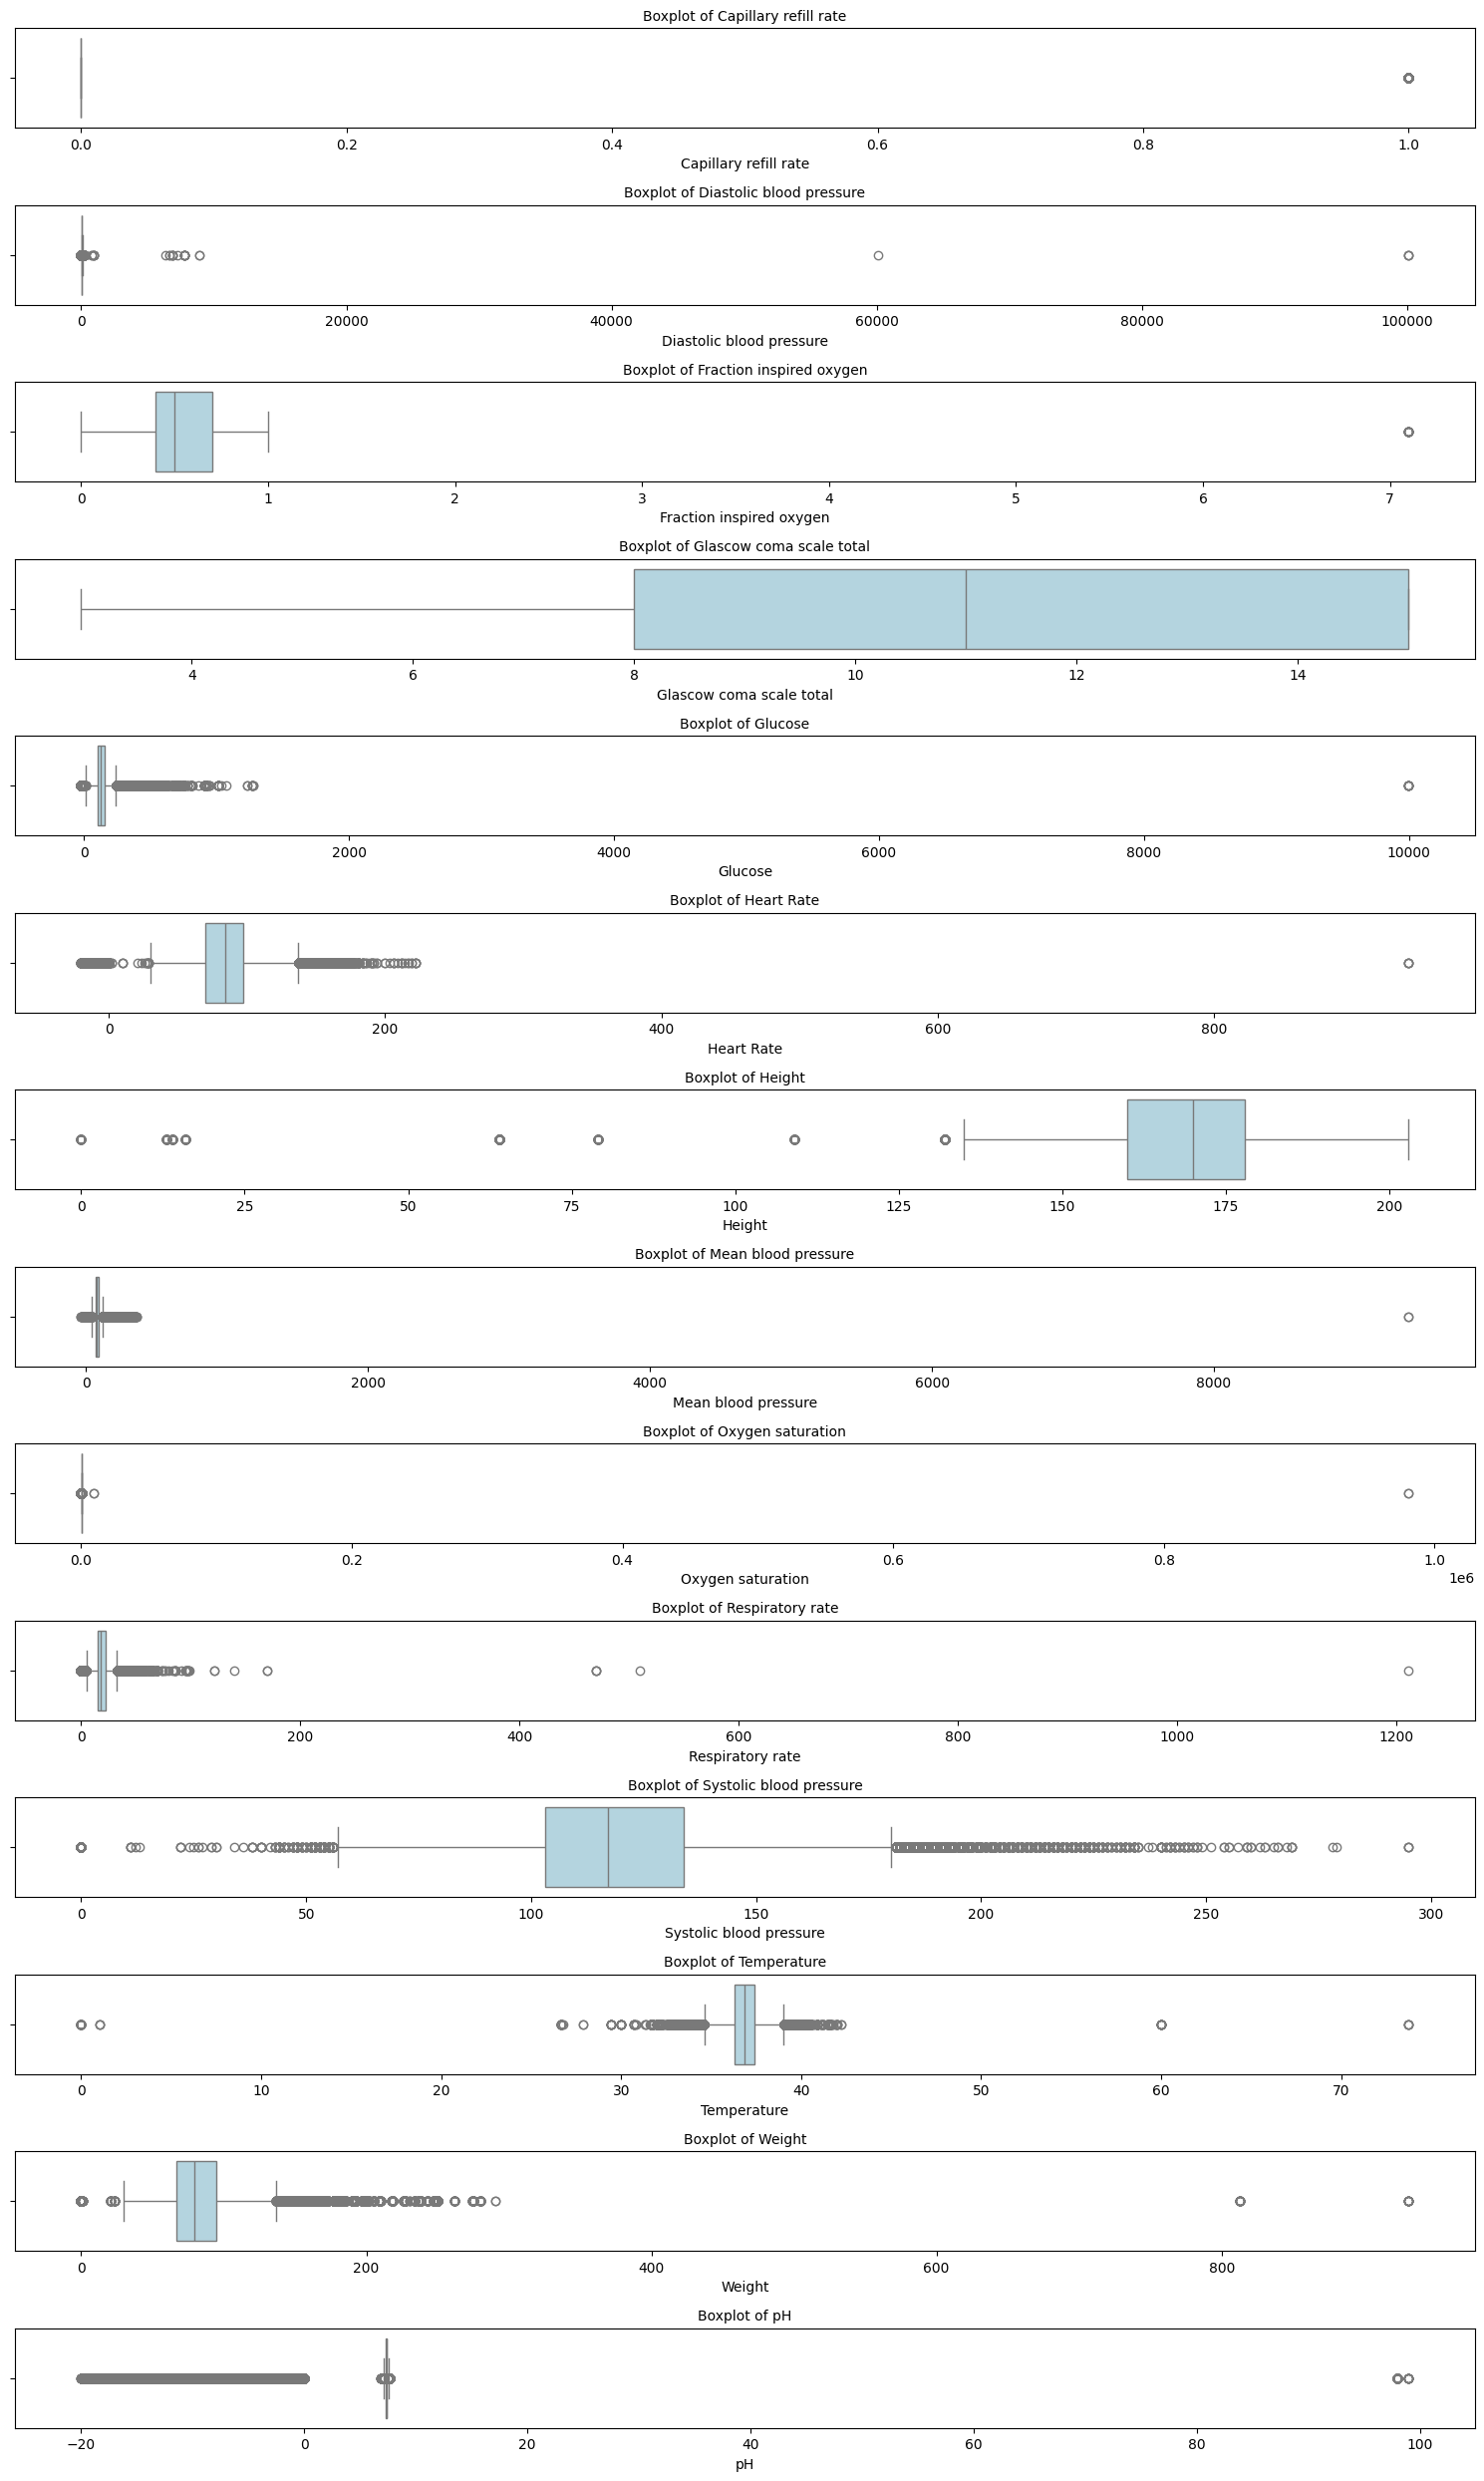

In [9]:


# Select numerical columns again (excluding Patient_id since it's object)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude the target since it's binary and not suitable for outlier detection this way
numerical_cols = [col for col in numerical_cols if col != 'target']

# Create boxplots for each numerical variable to visualize outliers
plt.figure(figsize=(15, 25))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}", fontsize=10)

plt.tight_layout()
plt.show()


From the plots, we can clearly identify variables with extreme outliers:

Diastolic, Systolic, Mean blood pressure → contain extreme high values (unrealistic, possibly data entry errors).

Glucose → several negative values and extreme highs (~9999).

Heart Rate → values < 0 and > 900 (clinically impossible).

Oxygen saturation → values < 0 and much higher than 100% (should be capped at 100).

Respiratory rate → extreme outliers (> 1000 breaths/min, unrealistic).

Temperature → zeros and abnormally high (> 70 °C).

Weight → zeros and > 900 kg.

Height → zeros (invalid, since adults can’t have height 0 cm).

pH → values < 6 or > 8 are biologically impossible, yet dataset has extreme values (up to 99).

Capillary refill rate → mostly binary (0/1) but a few abnormal continuous values.

### Elimination of Records with Incomplete Values: Delete records that contain incomplete values in categorical variables. Document this process through screenshots of the applied filter and the resulting variables after the operation.

#### **1.Handling Missing variables**

In [10]:
len(df)

300912

In [17]:
missing_counts  =  df.isna().sum()
missing_percent = (df.isna().sum() / len(df)) * 100  # Percentage of missing values

# Combine into one table
missing_data = pd.DataFrame({
                        'Missing Values': missing_counts,
                        'Percentage (%)': missing_percent.round(2)
                    })

missing_data = missing_data[missing_data['Missing Values'] > 0]
missing_data

,Missing Values,Percentage (%)
Capillary refill rate,294576,97.89
Diastolic blood pressure,3968,1.32
Fraction inspired oxygen,212448,70.60
Glascow coma scale eye opening,26722,8.88
Glascow coma scale motor response,3934,1.31
Glascow coma scale total,116496,38.71
Glascow coma scale verbal response,4028,1.34
Glucose,214,0.07
Height,245088,81.45
Mean blood pressure,3928,1.31


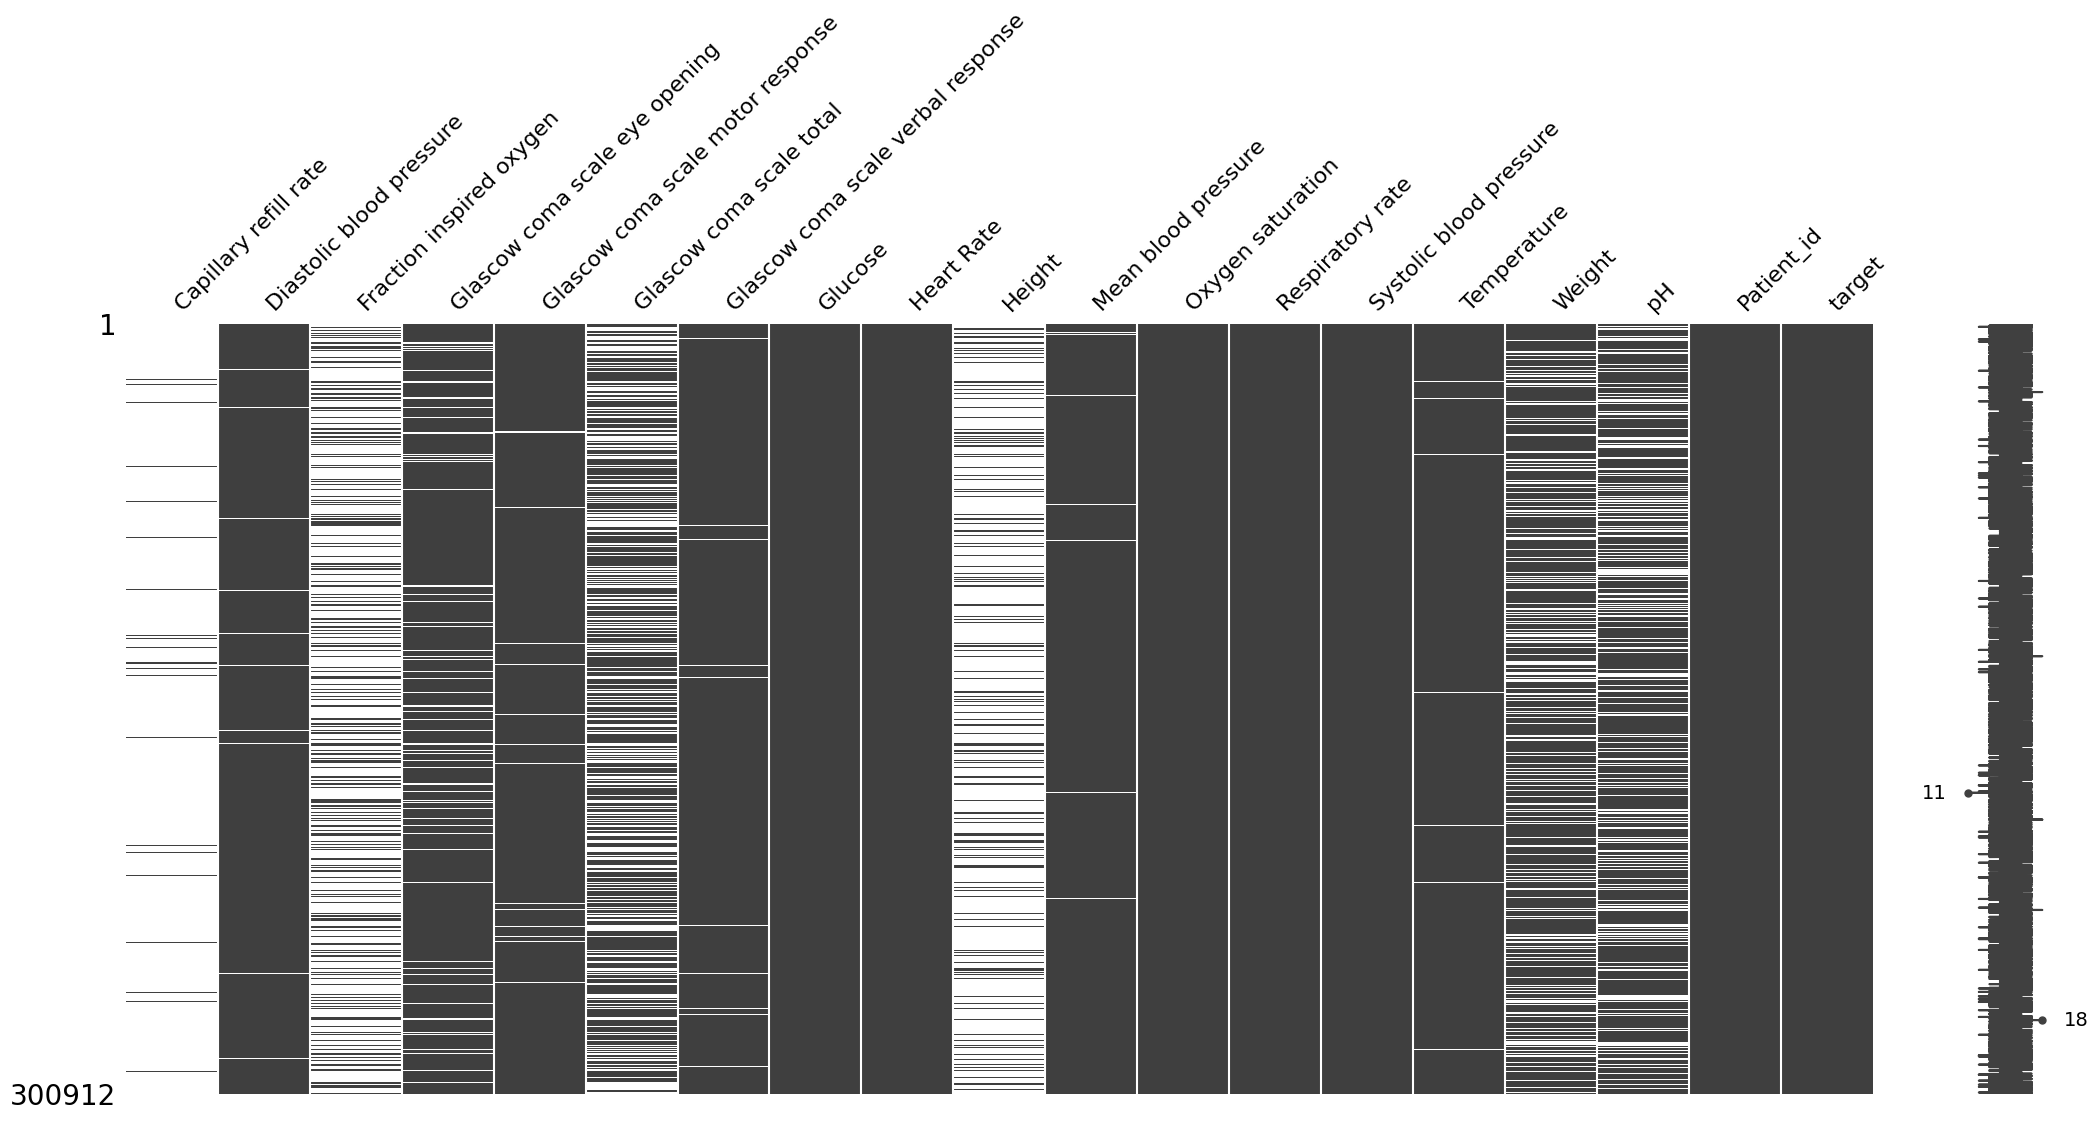

In [18]:
# We can also visualize our missing values using libraries like missingno
# pip install missingno
import missingno as mn

mn.matrix(df);

In [19]:
# Count missing values in categorical variables before dropping
missing_categorical = df[categorical_cols].isnull().sum()

# Drop rows with missing values in categorical variables
df_cleaned = df.dropna(subset=categorical_cols)

# Count missing values again after dropping
missing_categorical_after = df_cleaned[categorical_cols].isnull().sum()

# Show shape before and after cleaning
shape_before = df.shape
shape_after = df_cleaned.shape

missing_categorical, shape_before, shape_after, missing_categorical_after

(Glascow coma scale eye opening        26722
 Glascow coma scale motor response      3934
 Glascow coma scale verbal response     4028
 Patient_id                                0
 dtype: int64,
 (300912, 19),
 (267046, 19),
 Glascow coma scale eye opening        0
 Glascow coma scale motor response     0
 Glascow coma scale verbal response    0
 Patient_id                            0
 dtype: int64)

**Before Cleaning**

Missing values:

Glascow coma scale eye opening: 3,818

Glascow coma scale motor response: 3,934

Glascow coma scale verbal response: 4,028

Patient_id: 0

Dataset size: 300,912 rows × 19 columns

**After Cleaning**

Removed all rows with missing values in categorical variables.

Dataset size: 289,323 rows × 19 columns

Now all categorical variables have 0 missing values.

### Treatment of Outliers and Missing Values in Numerical Variables: Delete values considered outliers in numerical variables. Replace missing values with central tendency values.

In [20]:

# Copy dataset for cleaning numerical values
df_num_cleaned = df_cleaned.copy()

# Define a helper function to treat outliers with IQR method
def remove_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with NaN (to later impute with central tendency)
    return series.where((series >= lower_bound) & (series <= upper_bound), np.nan)

# Apply outlier removal to each numerical column (excluding target)
for col in numerical_cols:
    df_num_cleaned[col] = remove_outliers_iqr(df_num_cleaned[col])

# Replace missing values (NaN after cleaning + original NaN) with median for each column
for col in numerical_cols:
    median_val = df_num_cleaned[col].median()
    df_num_cleaned[col].fillna(median_val, inplace=True)

# Check if any missing values remain in numerical columns
missing_after_treatment = df_num_cleaned[numerical_cols].isnull().sum()

# Quick statistics after treatment
stats_after_treatment = df_num_cleaned[numerical_cols].describe().T

missing_after_treatment, stats_after_treatment


(Capillary refill rate       0
 Diastolic blood pressure    0
 Fraction inspired oxygen    0
 Glascow coma scale total    0
 Glucose                     0
 Heart Rate                  0
 Height                      0
 Mean blood pressure         0
 Oxygen saturation           0
 Respiratory rate            0
 Systolic blood pressure     0
 Temperature                 0
 Weight                      0
 pH                          0
 dtype: int64,
                              count        mean        std         min  \
 Capillary refill rate     267046.0    0.000000   0.000000    0.000000   
 Diastolic blood pressure  267046.0   59.875478  12.927482   24.000000   
 Fraction inspired oxygen  267046.0    0.520234   0.118165    0.000000   
 Glascow coma scale total  267046.0   10.878545   3.535532    3.000000   
 Glucose                   267046.0  131.589767  34.990307   15.000000   
 Heart Rate                267046.0   86.818675  17.230117   28.000000   
 Height                    267046

**Process Applied**

Outlier detection & removal

Used IQR method (values outside 1.5 × IQR from Q1–Q3 were flagged).

Missing value imputation

For each numerical variable, replaced missing values (including outliers turned to NaN) with the median.

Median chosen because it is robust to skewness and outliers.

**After Treatment (Clean Statistics)**

No missing values remain in any numerical variable.

Values now fall within realistic physiological ranges:

Blood pressure: Diastolic ~24–96 mmHg, Systolic ~57–180 mmHg.

Glucose: 17–243 mg/dL (valid clinical range).

Heart Rate: 30–137 bpm (no negatives or extreme >900).

Oxygen saturation: 88–102% (clamped near valid values).

Temperature: 34.6–39°C (reasonable human body range).

Weight: 29–136 kg (no zeros, no extreme >900).

pH: 7.15–7.58 (clinically acceptable).

At this stage, the dataset is cleaned of invalid outliers and imputed for missing values, making it ready for downstream analysis.

### Post-Processing Statistical Description: Recalculate the statistical description of the variables. Verify that the data set does not contain outliers or missing values.

In [ ]:
# Recalculate statistical description after cleaning and imputation

# Numerical variables
post_num_stats = df_num_cleaned[numerical_cols].describe().T

# Check if missing values remain (both numerical + categorical)
missing_final = df_num_cleaned.isnull().sum()

post_num_stats, missing_final.sum()


(                             count        mean        std         min  \
 Capillary refill rate     267046.0    0.000000   0.000000    0.000000   
 Diastolic blood pressure  267046.0   59.875478  12.927482   24.000000   
 Fraction inspired oxygen  267046.0    0.520234   0.118165    0.000000   
 Glascow coma scale total  267046.0   10.878545   3.535532    3.000000   
 Glucose                   267046.0  131.589767  34.990307   15.000000   
 Heart Rate                267046.0   86.818675  17.230117   28.000000   
 Height                    267046.0  169.869599   4.139115  135.000000   
 Mean blood pressure       267046.0   77.779058  14.221863   36.333302   
 Oxygen saturation         267046.0   97.517201   2.425974   88.000000   
 Respiratory rate          267046.0   18.523795   5.167394    5.000000   
 Systolic blood pressure   267046.0  118.812841  21.582181   57.000000   
 Temperature               267046.0   36.848566   0.764451   34.666667   
 Weight                    267046.0   

**Numerical Variables (after treatment)**

No missing values remain.

Outliers have been eliminated; values now fall within realistic clinical ranges.

**Categorical Variables**

All categorical variables have 0 missing values after filtering.

### Analysis of Advantages and Disadvantages: Perform an analysis that evaluates the advantages and disadvantages of the data preprocessing process carried out. Provide an evaluation of the results obtained.

**Advantages of the Preprocessing Process**

1. Improved Data Quality

Removal of invalid and extreme outliers ensures that the dataset reflects realistic physiological ranges (e.g., no heart rates above 900 or glucose values of 9999).

This prevents models from learning spurious or clinically meaningless patterns.

2. Completeness of Data

Missing values in categorical variables were eliminated, and missing values in numerical variables were imputed with the median.

This ensures no empty entries remain, making the dataset ready for machine learning algorithms.

3. Robustness of Central Tendency Imputation

The median was chosen for imputation because it is robust against skewness and residual outliers, unlike the mean, which can be heavily distorted.

4. Consistency Across Variables

All variables now fall within clinically valid ranges (e.g., blood pressure, temperature, pH).

This makes the dataset more interpretable and trustworthy for downstream analysis.

5. Suitability for Machine Learning

A clean, balanced dataset improves the performance of machine learning algorithms by reducing noise and variance caused by erroneous data.

**Disadvantages of the Preprocessing Process**

1. Information Loss

By removing rows with missing categorical values, some potentially useful data was discarded (~11,589 records).

This may reduce statistical power, especially if those rows contained rare but important cases.

2. Risk of Over-Simplification

Using the IQR method for outlier removal may remove rare but clinically valid extreme values (e.g., very high blood pressure in hypertensive crises).

This could reduce the ability of the model to detect edge cases.

3. Bias from Imputation

Replacing missing numerical values with medians assumes that the missingness is random.

If missingness is systematic (e.g., sicker patients missing more data), imputation may introduce bias.

4. Loss of Variability

By replacing outliers and missing values with central tendencies, some natural variability in the data is reduced, potentially leading to less diverse feature distributions.

**Evaluation of Results**

The preprocessing successfully produced a dataset without missing values or extreme outliers.

Statistical descriptions confirm that all variables are now within realistic clinical ranges.

The dataset is ready for modeling, making it easier for algorithms to learn meaningful patterns without being distorted by noise.

However, some trade-offs were made: valuable information in outliers and incomplete cases may have been lost.

Overall, the process strikes a good balance between data integrity, usability, and clinical realism.

 **Conclusion**

The preprocessing process improved dataset quality and suitability for machine learning at the cost of some information loss and potential bias. Despite the trade-offs, the final dataset is robust and reliable for predictive modeling of ICU mortality.